In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from config import ORDER

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

df_sample = pd.read_csv("../data/focal_papers.csv")
df_generated = pd.read_csv("../data/generated_references.csv")
df_ground_truth = pd.read_csv("../data/ground_truth_references.csv")

# existing vs non-existent
df_existing = df_generated[df_generated["Exists"] == 1.0]
df_non_existent = df_generated[df_generated["Exists"] == 0.0]

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_30262/4232942735.py:18: DtypeWarning: Columns (4,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_generated = pd.read_csv("../data/generated_references.csv")


In [4]:
# additional computations
# number of references per field
number_of_references_per_field = df_generated.groupby("top_field").size()

# existence rate
references_existence_rate_per_field = df_generated.groupby(
    "top_field"
)["Exists"].mean()

# reorder
number_of_references_per_field = number_of_references_per_field[ORDER]
references_existence_rate_per_field = references_existence_rate_per_field[ORDER]

# confidence intervals
se_mean_existence = np.sqrt(
    references_existence_rate_per_field * (
        1 - references_existence_rate_per_field
    ) / number_of_references_per_field
)
z_score = norm.ppf(0.975)

reference_existence_lower_bound = (
    references_existence_rate_per_field - (z_score * se_mean_existence)
)
reference_existence_upper_bound = (
    references_existence_rate_per_field + (z_score * se_mean_existence)
)

# citations
existing_citations_per_field = df_existing.groupby(
    "top_field"
)["Citations"].median()
groundtruth_citations_per_field = df_ground_truth.groupby(
    "top_field"
)["Citation_Count_x"].median()

# references
existing_references_per_field = df_existing.groupby(
    "top_field"
)["References"].median()
groundtruth_references_per_field = df_ground_truth.groupby(
    "top_field"
)["Reference_Count_x"].median()

# reorder
existing_citations_per_field = existing_citations_per_field[ORDER]
groundtruth_citations_per_field = groundtruth_citations_per_field[ORDER]
existing_references_per_field = existing_references_per_field[ORDER]
groundtruth_references_per_field = groundtruth_references_per_field[ORDER]

Text(-0.07, 1.0, '\\textbf{e}')

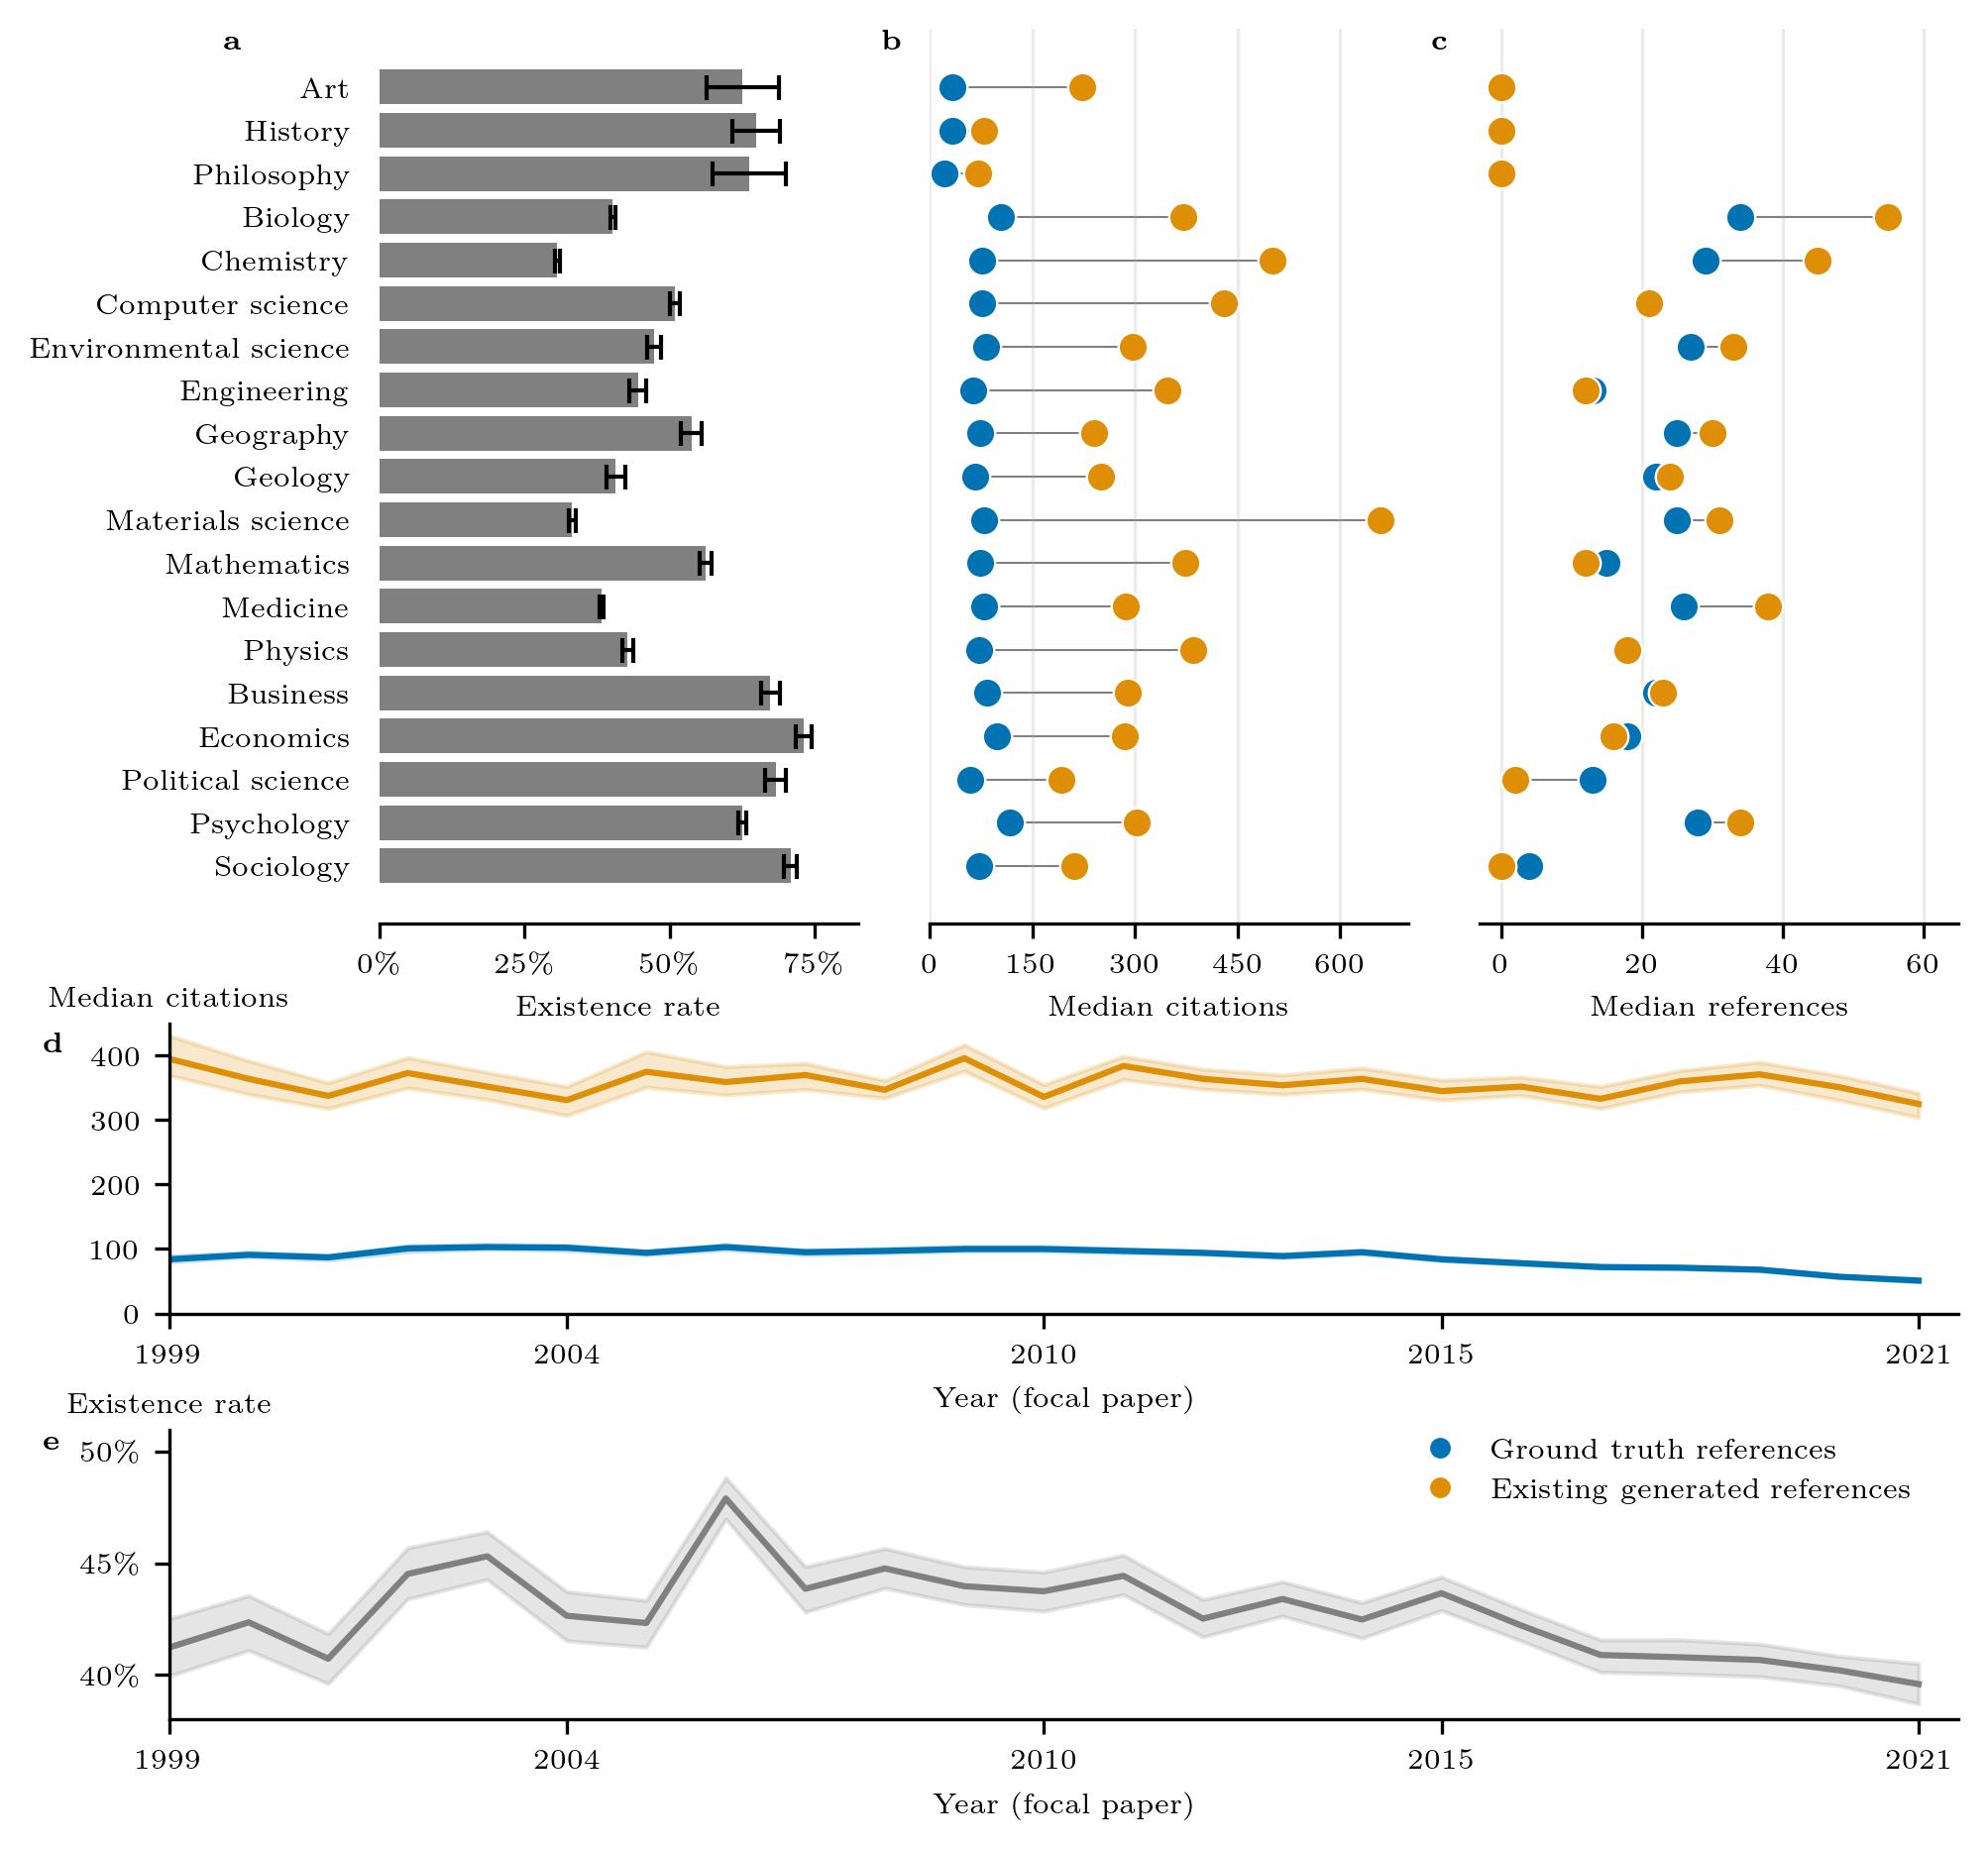

In [ ]:
fig = plt.figure(figsize=(7.08,6.69), dpi=300)

gs_upper = fig.add_gridspec(
    nrows=1, ncols=3, left=0.2, right=0.95, top=0.95, bottom=0.5, wspace=0.15, hspace=0.1,
)
gs_lower = fig.add_gridspec(
    nrows=2, ncols=1, left=0.1, right=0.95, top=0.45, bottom=0.1, hspace=0.4,
)

ax_a = fig.add_subplot(gs_upper[0])
ax_b = fig.add_subplot(gs_upper[1])
ax_c = fig.add_subplot(gs_upper[2]) 
ax_d = fig.add_subplot(gs_lower[0])
ax_e = fig.add_subplot(gs_lower[1])

ax2 = {'A': ax_a, 'B': ax_b, 'C': ax_c, 'D': ax_d, 'E': ax_e}
Figure2 = fig

ax2['B'].sharey(ax2['A'])
ax2['C'].sharey(ax2['A'])

# A
sns.barplot(
    x=references_existence_rate_per_field.values,
    y=references_existence_rate_per_field.index,
    color="#808080",
    ax=ax2["A"],
)

ax2["A"].errorbar(
    references_existence_rate_per_field, 
    references_existence_rate_per_field.index, 
    xerr=[
        references_existence_rate_per_field - reference_existence_lower_bound,
        reference_existence_upper_bound - references_existence_rate_per_field,
    ],
    fmt="none",
    ecolor="black",
    capsize=3,
    linewidth=1
)

ax2["A"].tick_params(left=False)
ax2["A"].set_xlabel("Existence rate", fontsize=7)
ax2["A"].set(xlim=(0, 0.825))
ax2["A"].set_ylabel("", fontsize=7)
ax2["A"].set_yticks(
    ticks=list(range(references_existence_rate_per_field.index.size)),
)
ax2["A"].set_yticklabels(
    labels=[],
    fontsize=7,
)
ax2["A"].set_xticks(
    [0,0.25,0.50,0.75],
    labels=[r"0$\%$",r"25$\%$",r"50$\%$",r"75$\%$"],
    fontsize=7,
)
ax2["A"].set_title("")
ax2["A"].grid(False)

sns.despine(ax=ax2["A"],left=True, bottom=False)

# B
sns.scatterplot(
    x=groundtruth_citations_per_field.values,
    y=groundtruth_citations_per_field.index,
    color="#0173b2",
    s=50,
    zorder=2,
    ax=ax2["B"],
)

sns.scatterplot(
    x=existing_citations_per_field.values,
    y=existing_citations_per_field.index,
    color="#de8f05",
    s=50,
    zorder=2,
    ax=ax2["B"],
)

for i in range(len(existing_citations_per_field)):
    sns.lineplot(
        x=[
            existing_citations_per_field.iloc[i],
            groundtruth_citations_per_field.iloc[i]
        ],
        y=[i, i],
        color='#808080',
        linewidth=0.5,
        zorder=1,
        ax=ax2["B"],
    )

ax2["B"].tick_params(left=False)

ax2["B"].set_xlabel("Median citations", fontsize=7)
ax2["B"].set(xlim=(0, 700))
ax2["B"].set_ylabel("", fontsize=7)
ax2["B"].set_yticks(
    ticks=list(range(references_existence_rate_per_field.index.size)),
)
ax2["B"].set_yticklabels(
    labels=[],
    fontsize=7,
)
ax2["B"].set_xticks(
    [0,150,300,450,600],
    labels=[r"0",r"150",r"300",r"450",r"600"],
    fontsize=7,
)
ax2["B"].set_title("")

ax2["B"].grid(alpha=0.25)
ax2["B"].grid(False)
ax2["B"].grid(axis='x')

sns.despine(ax=ax2["B"],left=True, bottom=False)

# C
sns.scatterplot(
    x=groundtruth_references_per_field.values,
    y=groundtruth_references_per_field.index,
    color="#0173b2",
    s=50,
    zorder=2,
    ax=ax2["C"],
)

sns.scatterplot(
    x=existing_references_per_field.values,
    y=existing_references_per_field.index,
    color="#de8f05",
    s=50,
    zorder=2,
    ax=ax2["C"],
)

for i in range(len(existing_references_per_field)):
    sns.lineplot(
        x=[
            existing_references_per_field.iloc[i],
            groundtruth_references_per_field.iloc[i]
        ],
        y=[i, i],
        color='gray',
        linewidth=0.5,
        zorder=1,
        ax=ax2["C"],
    )

ax2["C"].tick_params(left=False)

ax2["C"].set_xlabel("Median references", fontsize=7)
ax2["C"].set(xlim=(-3, 65))
ax2["C"].set_ylabel("", fontsize=7)
ax2["C"].set_yticks(
    ticks=list(range(references_existence_rate_per_field.index.size)),
)
ax2["C"].set_yticklabels(
    labels=[],
    fontsize=7,
)
ax2["C"].set_xticks([0,20,40,60], labels=[r"0",r"20",r"40",r"60"], fontsize=7)
ax2["C"].set_title("")

ax2["C"].grid(alpha=0.25)
ax2["C"].grid(False)
ax2["C"].grid(axis='x')

sns.despine(ax=ax2["C"],left=True, bottom=False)

# ticks
ax2["A"].set_yticks(
    ticks=list(range(references_existence_rate_per_field.index.size)),
)
ax2["A"].set_yticklabels(
    labels=[
        r"\scriptsize{" + i + "}" for i in references_existence_rate_per_field.index
    ],
    fontsize=7,
)

for key in ['B', 'C']:
    ax2[key].tick_params(labelleft=False)

# panel D
sns.lineplot(
    df_generated[df_generated["Exists"] == 1],
    x="Year_y",
    y="Citations",
    color="#de8f05",
    linewidth=1.5,
    estimator="median",
    errorbar="ci",
    ax=ax2["D"],
)

sns.lineplot(
    df_ground_truth,
    x="Year_y",
    y="Citation_Count_x",
    color="#0173b2",
    linewidth=1.5,
    estimator="median",
    errorbar="ci",
    ax=ax2["D"],
)
ax2["D"].set(xlim=(1999, 2021.5))
ax2["D"].set_xlabel("Year (focal paper)", fontsize=7)
ax2["D"].set_ylabel("Median citations", fontsize=7, rotation=0)
ax2["D"].yaxis.set_label_coords(0., 1.04)
ax2["D"].set_xticks(
    ticks=[1999, 2004, 2010, 2015, 2021],
    labels=["1999", "2004", "2010", "2015", "2021"],
    fontsize=7,
)
ax2["D"].set_yticks(
    [0,100,200,300,400],
    labels=[r"0",r"100",r"200",r"300",r"400"],
    fontsize=7,
)
ax2["D"].set_title("")
sns.despine(ax=ax2["D"],left=False, bottom=False)
ax2["D"].set_ylim(0, 450)

# E
sns.lineplot(
    df_generated,
    x="Year_y",
    y="Exists",
    color='#808080',
    linewidth=1.5,
    ax=ax2["E"],
    estimator='mean',
    errorbar="ci",
)

ax2["E"].set(ylim=(0.38, 0.51))
ax2["E"].set(xlim=(1999, 2021.5))
ax2["E"].set_xlabel("Year (focal paper)", fontsize=7)
ax2["E"].set_ylabel("Existence rate", fontsize=7, rotation=0)
ax2["E"].yaxis.set_label_coords(0., 1.04)
ax2["E"].set_xticks(
    ticks=[1999, 2004, 2010, 2015, 2021],
    labels=["1999", "2004", "2010", "2015", "2021"],
    fontsize=7,
)
ax2["E"].set_yticks(
    [0.40,0.45, 0.50],
    labels=[r"40$\%$",r"45$\%$",r"50$\%$"],
    fontsize=7
)
ax2["E"].set_title("")
sns.despine(ax=ax2["E"],left=False, bottom=False)

# legend
legend_elements = [
    mlines.Line2D(
        [], [], color='#0173b2', marker='o', linestyle='None', markersize=4,
        label='Ground truth references'
    ),
    mlines.Line2D(
        [], [], color='#de8f05', marker='o', linestyle='None', markersize=4,
        label='Existing generated references'
    ),
]
ax2["E"].legend(
    handles=legend_elements,
    loc='upper right',
    title='',
    title_fontsize=7,
    fontsize=7,
    frameon=False,
    bbox_transform=Figure2.transFigure,
    bbox_to_anchor=(0.94, 0.255),
)

# annotations
ax2["A"].text(-0.325, 1, r'\textbf{a}', transform=ax2["A"].transAxes, 
              fontsize=7, fontweight='bold', va='top', ha='left')
ax2["B"].text(-0.1, 1.0, r'\textbf{b}', transform=ax2["B"].transAxes, 
              fontsize=7, fontweight='bold', va='top', ha='left')
ax2["C"].text(-0.1, 1.0, r'\textbf{c}', transform=ax2["C"].transAxes, 
              fontsize=7, fontweight='bold', va='top', ha='left')
ax2["D"].text(-0.07, 0.97, r'\textbf{d}', transform=ax2["D"].transAxes, 
              fontsize=7, fontweight='bold', va='top', ha='left')
ax2["E"].text(-0.07, 1.0, r'\textbf{e}', transform=ax2["E"].transAxes, 
              fontsize=7, fontweight='bold', va='top', ha='left')